In [1]:
import os
import sys
import re
from datetime import datetime, timedelta
import pickle as pkl

import sparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from argparse import ArgumentParser

parser = ArgumentParser()
parser.add_argument('--datadir', type=str, default='../../data/ecl')
parser.add_argument('--cluster_ratio', type=float, default=0.1, help='cluster N nodes to [N*r] clusters')

args = parser.parse_args([
    '--cluster_ratio', '0'
])
print(args)

Namespace(cluster_ratio=0.0, datadir='../../data/ecl')


In [3]:
raw_data = pd.read_csv(os.path.join(args.datadir, 'electricity.txt'), delimiter=',', header=None)
# raw_data
# raw_data.index.freq = raw_data.index.inferred_freq
data = raw_data.values[:, :, np.newaxis]

In [4]:
timestamps = [datetime(year=2011, month=1, day=1) + timedelta(hours=1) * t for t in range(raw_data.shape[0])]
timestamps[0], timestamps[-1]

(datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2013, 12, 31, 23, 0))

In [5]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
0,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [6]:
raw_data.shape

(26304, 321)

In [7]:
node_types = np.zeros(raw_data.shape[1]).astype(np.int64)
edges = np.stack([np.arange(raw_data.shape[1]), np.arange(raw_data.shape[1])], axis=1).astype(np.int64)
edges_weights = np.zeros(edges.shape[0]).astype(np.float32)
print(node_types.shape, edges.shape, edges_weights.shape)

(321,) (321, 2) (321,)


(26304, 321, 1) 1096.0


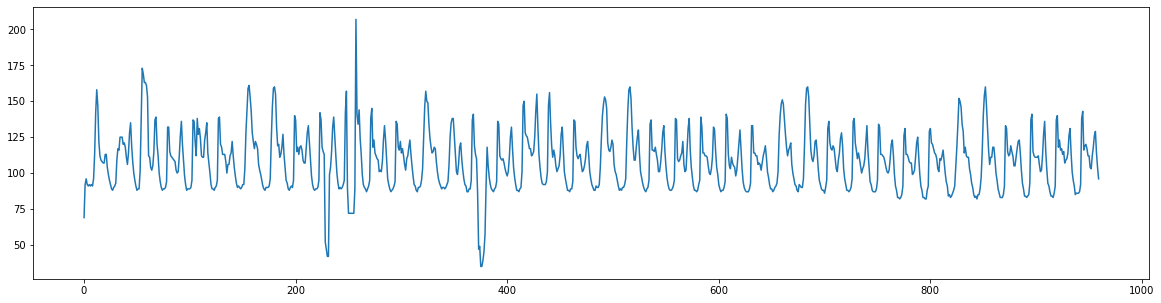

In [8]:
T, N, F = data.shape
data_agg = data.reshape(-1, 1, N, F).mean(axis=1)
print(data_agg.shape, data_agg.shape[0] / 24)

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(data_agg[:24*40, 1, 0])

data_agg_all = data_agg

In [9]:
volume_valid_region_borough = data_agg_all
edges_valid_region_borough = {
    'edges': edges,
    'edge_types': edges_weights,
    'node_types': node_types
}
temporal_info = {
    'start': timestamps[0],
    'delta': timedelta(hours=1)
}
print(temporal_info)

save_dir = args.datadir
sparse.save_npz(os.path.join(save_dir, 'volume_valid_region_borough.npz'), sparse.COO(volume_valid_region_borough))
np.savez(os.path.join(save_dir, 'edges_valid_region_borough.npz'), **edges_valid_region_borough)
np.savez(os.path.join(save_dir, 'temporal_info.npz'), **temporal_info)

{'start': datetime.datetime(2011, 1, 1, 0, 0), 'delta': datetime.timedelta(seconds=3600)}
